In [338]:
%matplotlib inline
%pylab inline --no-import-all
pylab.rcParams['figure.figsize'] = (18, 10)
pylab.rcParams['figure.dpi'] = (118)
import pandas as pd
from tabulate import tabulate
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as go_offline
import plotly.graph_objects as go
from scipy.interpolate import interp1d
from scipy import interpolate
from pprint import pprint
import urllib.request, json
import io
import re 
from palettable.colorbrewer.qualitative import Dark2_7

Populating the interactive namespace from numpy and matplotlib


In [339]:
#url = 'https://raw.githubusercontent.com/globalcitizen/2019-wuhan-coronavirus-data/master/data-sources/bno/data/20200201-043100-bno-2019ncov-data.csv'
df = pd.read_csv('https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv', encoding = "ISO-8859-1")
df2 = pd.read_csv('https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_hubei.csv', encoding = "ISO-8859-1")
df.tail(10)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
4106,4107,NaN,NaN,NaN,NaN,Hong Kong,1,22.270060,114.131150,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4107,4108,31,male,NaN,NaN,Singapore,1,1.281967,103.883501,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4108,4109,47,female,NaN,NaN,Singapore,1,1.281284,103.908585,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4109,4110,38,male,NaN,NaN,Singapore,1,1.280601,103.933669,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4110,4111,20s,female,Jönköping,NaN,Sweden,1,57.782778,14.160556,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4111,4112,NaN,male,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4112,4113,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4113,4114,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4114,4115,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4115,4116,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
df['city'].nunique()

408

In [341]:
#df['outcome'].value_counts()

In [342]:
#df['date_onset_symptoms'].unique()

In [343]:
df.groupby(['country'])['ID'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,country,count
3,China,4002
19,Thailand,19
10,Japan,14
15,Singapore,13
0,Australia,9
11,Malaysia,7
22,United States,6
5,France,6
6,Germany,6
16,South Korea,6


In [344]:
df.groupby('date_confirmation').count().cumsum()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
date_confirmation,,,,,,,,,,,,,,,,,,,,,
12.01.2020,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
15.01.2020,2,2,2,2,1,2,2,2,2,2,...,1,1,1,1,2,0,0,1,2,0
16.01.2020,3,3,3,2,2,3,3,3,3,3,...,1,1,1,1,2,0,0,1,2,0
17.01.2020,4,4,4,3,2,4,4,4,4,4,...,1,1,1,1,3,0,0,1,3,0
19.01.2020,5,5,5,4,3,5,5,5,5,5,...,1,1,1,1,3,0,1,2,4,0
20.01.2020,16,12,12,9,13,16,16,16,16,16,...,1,1,1,1,4,0,5,12,15,0
21.01.2020,50,36,36,43,47,50,50,50,50,50,...,1,2,1,1,6,12,25,46,49,0
22.01.2020,92,74,75,82,89,92,92,92,92,92,...,1,2,1,3,8,22,56,88,91,0
23.01.2020,184,116,117,170,179,184,184,184,184,184,...,1,2,1,3,13,25,138,178,183,0


In [345]:
pd.to_numeric(df['age'], errors='coerce').mean()

43.30696202531646

In [346]:
#df_by_country = df.groupby('country')

In [347]:
bydate_country = df.groupby(['country', 'date_confirmation']).size().to_frame('num')
bydate_country = bydate_country.sort_index(level=1)
#cuminf = bydate_country.cumsum()

/home/feynman/.local/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



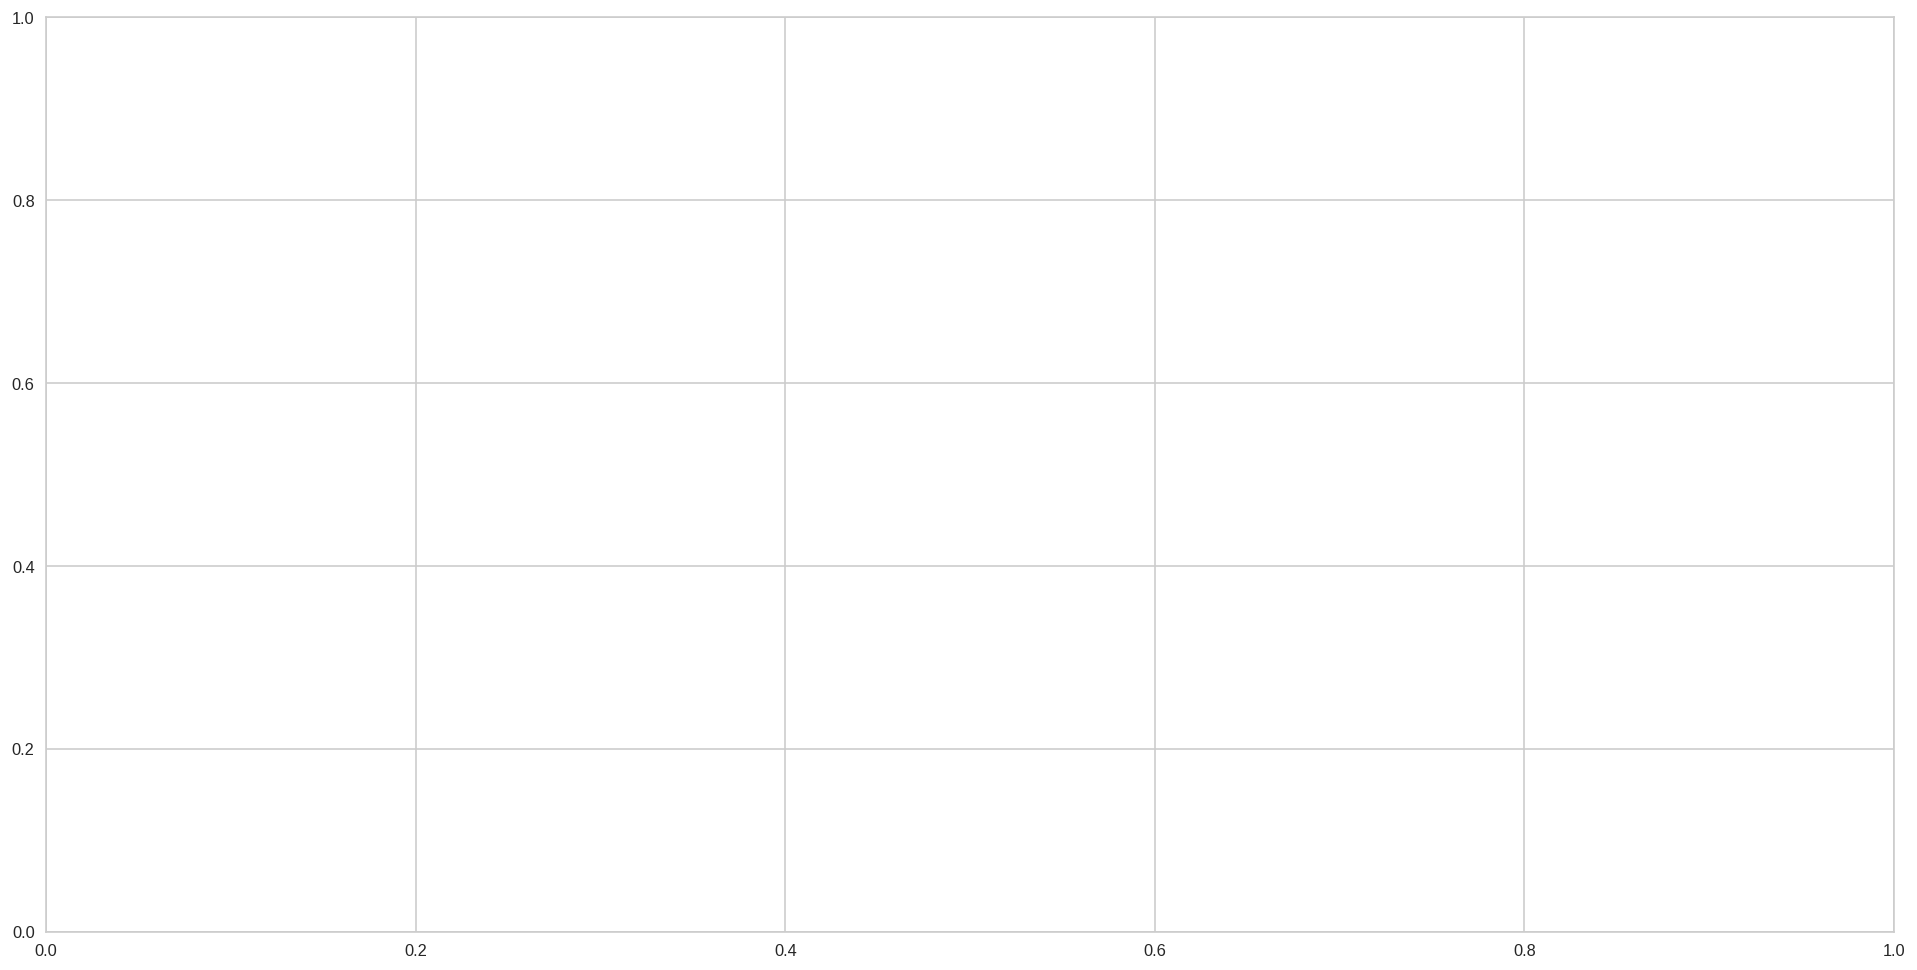

In [348]:
#bydate_country.plot('date_confirmation', 'country')
#bydate_country.index
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots()
totminch = bydate_country.drop(index='China').cumsum().interpolate()
minch = bydate_country.drop(index='China').unstack(level=0).cumsum().interpolate()
#totminch.reset_index(drop=True, inplace=True)

#totminch.groupby('date_confirmation')
totminch = totminch.groupby(level = 1)
totminch



In [349]:
#bydate_country.drop(index = 'China').index

In [350]:
nhubeicase = df.groupby('date_confirmation')['ID'].count().reset_index(name='count').sort_values(['date_confirmation'], ascending=True)
hubeicase = df2.groupby('date_confirmation')['ID'].count().reset_index(name='count').sort_values(['date_confirmation'], ascending=True)

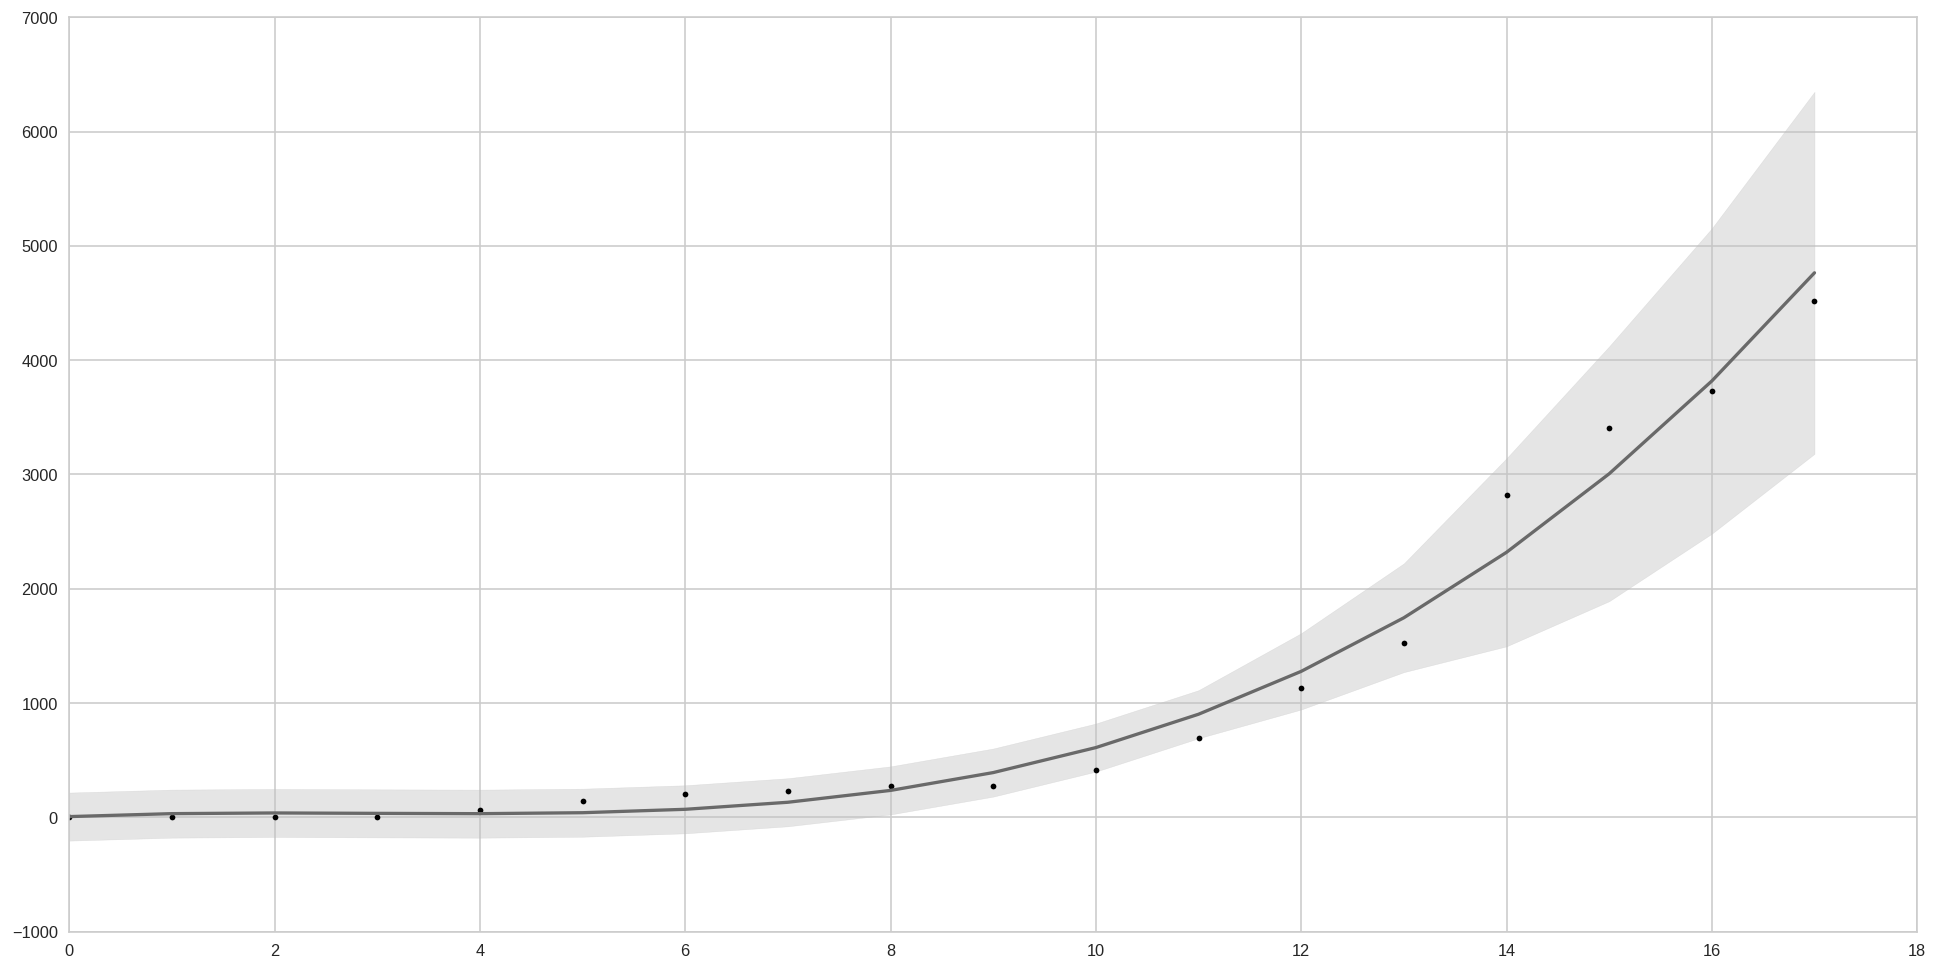

In [351]:
plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.facecolor'] = 'grey'
#plt.rcParams['axes.facecolor'] = 'grey'
fig,ax = plt.subplots()

frames = [nhubeicase, hubeicase]
totalcases = pd.concat((frames), axis=0).sort_index(level=0, ascending=True)
totalcases = totalcases[totalcases.date_confirmation != 'not sure']
totalcases = totalcases.groupby(['date_confirmation'],as_index=False).first()
totalcases['count'] = totalcases['count'].cumsum()

#totalcases.head(1000)

#smooth_cases = interp1d(totalcases.index, totalcases['count'],kind='cubic')

#totalcases.plot(kind='line', x='date_confirmation', y='count', legend='best', ax=ax)
n_steps = 12
x = totalcases.index
y = totalcases['count']

ystd = y.rolling(n_steps).std().bfill(axis = 0) 

yinterp = interpolate.UnivariateSpline(x, y, s = 5e9)(x)

#smooth_path = y.rolling(n_steps).mean()
#path_deviation = 2 * y.rolling(n_steps).std()
#plt.plot(smooth_path, linewidth=2)
#sy = y.rolling(n_steps).std()
under_line = (yinterp-ystd)
over_line  = (yinterp+ystd)

#uinterp = interpolate(x, under_line, s = 5e8)(x)
#ointerp = interpolate(x, over_line, s = .5e8)(x)

#plt.plot(under_line, linewidth=1)
plt.plot(x, y, 'k.', label = 'Original')
plt.plot(x, yinterp, 'dimgrey', label = 'Interpolated', linewidth=2)
plt.fill_between(y.index, under_line, over_line, color='silver', alpha=.4) #std curves.
plt.show()


In [147]:
ystd.bfill(axis = 0) 


0        1.290994
1        1.290994
2        1.290994
3        1.290994
4       31.010751
5       65.739384
6       86.351993
7       74.504474
8       57.046034
9       37.052890
10      79.887421
11     198.226091
12     377.036139
13     488.240719
14     915.247508
15    1069.325177
16     971.810810
17     708.869523
Name: count, dtype: float64

In [140]:
uinterp

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [ ]:
####GEODOSE###

url = 'https://docs.google.com/spreadsheets/d/18X1VM1671d99V_yd-cnUI1j8oSG2ZgfU_q1HfOizErA/export?format=csv&id'
data = pd.read_csv(url)
data = data.fillna(0)
data.head()

In [ ]:
cases = data[data.columns.drop(list(data.filter(regex='deaths|location|latitude|longitude')))]
deaths = data[data.columns.drop(list(data.filter(regex='deaths|location|latitude|longitude')))]

cases = cases.rename(columns=lambda x: re.sub("confirmedcases_", "", x))
deaths.rename(columns=lambda x: x[10:0], inplace=True)

case_bycountry = cases.groupby(['country'],as_index=False).first()

In [ ]:
case_bycountry.head(50)

In [187]:
print(plt.style.available)

['seaborn-talk', 'seaborn-dark-palette', 'Solarize_Light2', 'grayscale', 'seaborn', 'dark_background', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-poster', 'seaborn-pastel', '_classic_test', 'seaborn-paper', 'seaborn-muted', 'ggplot', 'seaborn-white', 'classic', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-colorblind', 'fivethirtyeight', 'seaborn-whitegrid', 'bmh', 'tableau-colorblind10', 'seaborn-dark', 'seaborn-bright', 'fast']
